In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_time_f=pd.read_csv("time_domain_features_train.csv")
train_non_lin_f=pd.read_csv("heart_rate_non_linear_features_train.csv")
train_freq_f=pd.read_csv("frequency_domain_features_train.csv")

In [3]:
train_time_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   KURT               369289 non-null  float64
 10  SKEW               369289 non-null  float64
 11  MEAN_REL_RR        369289 non-null  float64
 12  MEDIAN_REL_RR      369289 non-null  float64
 13  SDRR_REL_RR        369289 non-null  float64
 14  RMSSD_REL_RR       369289 non-null  float64
 15  SDSD_REL_RR        369289 non-null  float64
 16  SD

In [4]:
train_non_lin_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   uuid       369289 non-null  object 
 1   SD1        369289 non-null  float64
 2   SD2        369289 non-null  float64
 3   sampen     369289 non-null  float64
 4   higuci     369289 non-null  float64
 5   datasetId  369289 non-null  int64  
 6   condition  369289 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 19.7+ MB


In [5]:
train_freq_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   uuid     369289 non-null  object 
 1   VLF      369289 non-null  float64
 2   VLF_PCT  369289 non-null  float64
 3   LF       369289 non-null  float64
 4   LF_PCT   369289 non-null  float64
 5   LF_NU    369289 non-null  float64
 6   HF       369289 non-null  float64
 7   HF_PCT   369289 non-null  float64
 8   HF_NU    369289 non-null  float64
 9   TP       369289 non-null  float64
 10  LF_HF    369289 non-null  float64
 11  HF_LF    369289 non-null  float64
dtypes: float64(11), object(1)
memory usage: 33.8+ MB


In [7]:
merge_data=pd.merge(train_time_f, train_non_lin_f)
merge_data_1=pd.merge(merge_data,train_freq_f)
merge_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   KURT               369289 non-null  float64
 10  SKEW               369289 non-null  float64
 11  MEAN_REL_RR        369289 non-null  float64
 12  MEDIAN_REL_RR      369289 non-null  float64
 13  SDRR_REL_RR        369289 non-null  float64
 14  RMSSD_REL_RR       369289 non-null  float64
 15  SDSD_REL_RR        369289 non-null  float64
 16  SD

In [8]:
merge_data_1['condition'].unique()

array(['no stress', 'interruption', 'time pressure'], dtype=object)

In [9]:
merge_data_1['condition'].value_counts()

no stress        200082
interruption     105150
time pressure     64057
Name: condition, dtype: int64

In [26]:
merge_data_1['condition'].head()

0       no stress
1    interruption
2    interruption
3       no stress
4       no stress
Name: condition, dtype: object

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(drop='first'), 
                                        [25])], 
                                      remainder='passthrough')
data=columnTransformer.fit_transform(merge_data_1)
  
data_t = pd.DataFrame(columnTransformer.fit_transform(merge_data_1), 
                     columns=['no_stress', 'time_pressure',
       'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
      'KURT_REL_RR', 'SKEW_REL_RR', 'uuid', 'SD1', 'SD2', 'sampen', 'higuci',
      'datasetId', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU',
      'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF'], dtype = np.str) 
data_t.head()


,no_stress,time_pressure,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,...,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,1.0,0.0,885.1578445866667,853.7637300000001,140.97274123567058,15.55450455844723,15.55337133749991,9.06314570843159,69.49995211314423,11.13333333333333,...,72.20328671413414,1009.249419006743,27.375666143581746,98.48526285120838,15.52260250018865,0.4210471422841141,1.514737148791649,3686.666157138838,65.0180547362775,0.015380343260901031
1,0.0,0.0,939.4253707266668,948.357865,81.31774203066308,12.964439460159,12.96419467067471,6.272368526272232,64.36314993344149,5.6,...,76.97572806666177,690.1132747865352,22.95413940848525,99.69539742643744,2.108525418184262,0.07013252485297729,0.3046025735625027,3006.487250536725,327.2966352859147,0.0030553323566141627
2,0.0,0.0,898.1860468266667,907.00686,84.49723584848405,16.30527866953465,16.30527369768982,5.1822012711970125,67.45006558887458,13.06666666666667,...,51.1522252637311,1298.222619271141,48.335103574446535,98.95047181864409,13.769729436924427,0.5126711618223939,1.049528181355908,2685.879460817948,94.28090981874143,0.01060660108098805
3,1.0,0.0,881.7578645266667,893.4600300000002,90.370537239131,15.72046848681109,15.72006805805942,5.74859059161937,68.80956180311732,11.8,...,70.1803081569023,1005.981659178765,29.290304671510647,98.224706095648,18.181913475932628,0.5293871715870679,1.775293904352013,3434.520980443188,55.328701267354546,0.01807380215139855
4,1.0,0.0,809.6253311400003,811.1848650000002,62.76624216006203,19.21381886895778,19.21365745423712,3.2667239442684863,74.56572751929652,20.2,...,43.91836640223104,1421.782051436601,54.24216013069808,96.72000733740386,48.215822402233094,1.8394734670708748,3.2799926625961437,2621.175203957172,29.48787307982851,0.03391224579992039


In [18]:
data_t.head()

,time_pressure,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,...,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,1.0,0.0,885.1578445866667,853.7637300000001,140.97274123567058,15.55450455844723,15.55337133749991,9.06314570843159,69.49995211314423,11.13333333333333,...,72.20328671413414,1009.249419006743,27.375666143581746,98.48526285120838,15.52260250018865,0.4210471422841141,1.514737148791649,3686.666157138838,65.0180547362775,0.015380343260901031
1,0.0,0.0,939.4253707266668,948.357865,81.31774203066308,12.964439460159,12.96419467067471,6.272368526272232,64.36314993344149,5.6,...,76.97572806666177,690.1132747865352,22.95413940848525,99.69539742643744,2.108525418184262,0.07013252485297729,0.3046025735625027,3006.487250536725,327.2966352859147,0.0030553323566141627
2,0.0,0.0,898.1860468266667,907.00686,84.49723584848405,16.30527866953465,16.30527369768982,5.1822012711970125,67.45006558887458,13.06666666666667,...,51.1522252637311,1298.222619271141,48.335103574446535,98.95047181864409,13.769729436924427,0.5126711618223939,1.049528181355908,2685.879460817948,94.28090981874143,0.01060660108098805
3,1.0,0.0,881.7578645266667,893.4600300000002,90.370537239131,15.72046848681109,15.72006805805942,5.74859059161937,68.80956180311732,11.8,...,70.1803081569023,1005.981659178765,29.290304671510647,98.224706095648,18.181913475932628,0.5293871715870679,1.775293904352013,3434.520980443188,55.328701267354546,0.01807380215139855
4,1.0,0.0,809.6253311400003,811.1848650000002,62.76624216006203,19.21381886895778,19.21365745423712,3.2667239442684863,74.56572751929652,20.2,...,43.91836640223104,1421.782051436601,54.24216013069808,96.72000733740386,48.215822402233094,1.8394734670708748,3.2799926625961437,2621.175203957172,29.48787307982851,0.03391224579992039


In [27]:
data_t=data_t.drop(['uuid','datasetId'],axis=1)
data_t=pd.DataFrame(data_t,dtype=np.float)

In [19]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 38 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   time_pressure      369289 non-null  object
 1   MEAN_RR            369289 non-null  object
 2   MEDIAN_RR          369289 non-null  object
 3   SDRR               369289 non-null  object
 4   RMSSD              369289 non-null  object
 5   SDSD               369289 non-null  object
 6   SDRR_RMSSD         369289 non-null  object
 7   HR                 369289 non-null  object
 8   pNN25              369289 non-null  object
 9   pNN50              369289 non-null  object
 10  KURT               369289 non-null  object
 11  SKEW               369289 non-null  object
 12  MEAN_REL_RR        369289 non-null  object
 13  MEDIAN_REL_RR      369289 non-null  object
 14  SDRR_REL_RR        369289 non-null  object
 15  RMSSD_REL_RR       369289 non-null  object
 16  SDSD_REL_RR        3

In [12]:
merge_data_1.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'uuid', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU',
       'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF'],
      dtype='object')

In [ ]:
data_t.head()

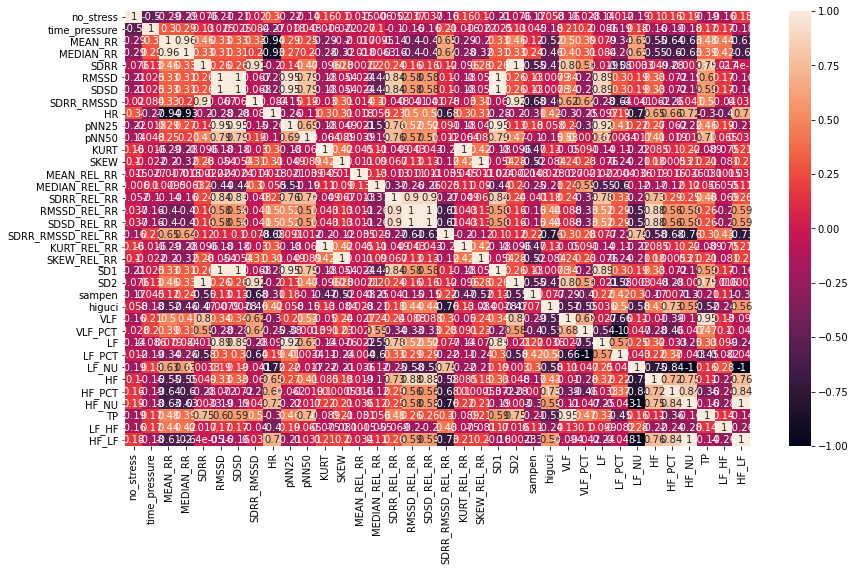

In [28]:
df_cor=data_t.corr()
plt.figure(figsize=(14,8))
sns.heatmap(df_cor,vmax=1.0,vmin=-1.0,annot=True)

In [31]:
df_train=data_t.drop(['MEDIAN_RR', 'SD1','SD2','KURT_REL_RR','SKEW_REL_RR','SDSD_REL_RR','RMSSD','HF_LF'],axis=1)
df_train.head()

,no_stress,time_pressure,MEAN_RR,SDRR,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF
0,1.0,0.0,885.157845,140.972741,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,...,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055
1,0.0,0.0,939.425371,81.317742,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,...,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635
2,0.0,0.0,898.186047,84.497236,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,...,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910
3,1.0,0.0,881.757865,90.370537,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,...,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701
4,1.0,0.0,809.625331,62.766242,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,...,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873


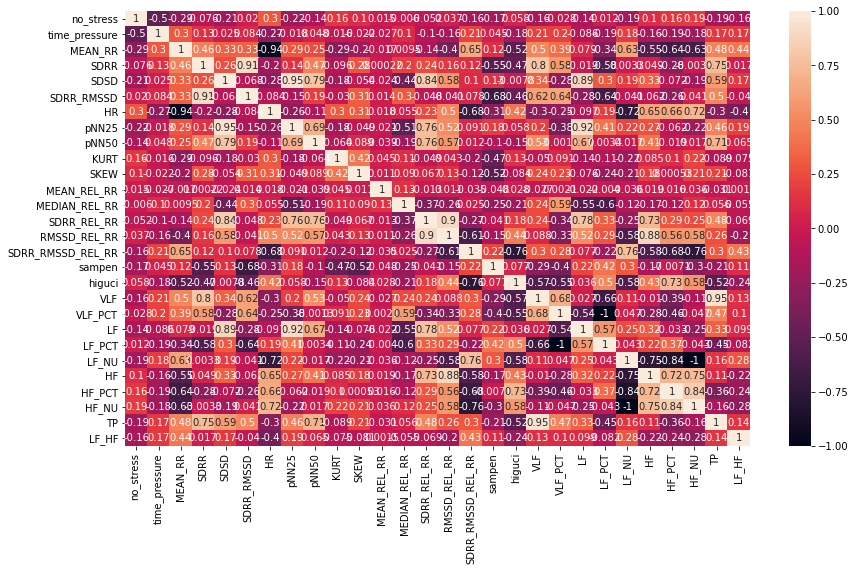

In [32]:
df_train_cor=df_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(df_train_cor,vmax=1.0,vmin=-1.0,annot=True)

In [ ]:
plt.figure(figsize=(25,8))
sns.boxplot(x="variable", y="value", data=pd.melt(df_train))

In [ ]:
sns.distplot(df_train['MEAN_RR'])

In [ ]:
sns.pairplot(df_train)

In [45]:
X=df_train.drop('HR',axis=1)
y=df_train['HR']
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.30,random_state=40)#stratifying samples since we unbalanced class counts

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_val = pd.DataFrame(scaler.fit_transform(X_val))

In [46]:
# Importing models 
from sklearn.linear_model import Lasso
lasso_lr=Lasso()
lasso_lr.fit(X_train,y_train)
lasso_pred=lasso_lr.predict(X_val)

from sklearn.metrics import accuracy_score
#test_accuracy=accuracy_score(y_test,lasso_pred)
lasso_lr.score(X_val,y_val)

0.9342636043831938

In [47]:
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, lasso_lr.coef_[idx]))

The coefficient for no_stress is 0.0
The coefficient for time_pressure is -0.0
The coefficient for MEAN_RR is -7.9783938327152555
The coefficient for SDRR is 0.0
The coefficient for SDSD is -0.0
The coefficient for SDRR_RMSSD is 0.39089187828020217
The coefficient for pNN25 is -0.0
The coefficient for pNN50 is 0.0
The coefficient for KURT is 0.0
The coefficient for SKEW is 0.0
The coefficient for MEAN_REL_RR is -0.0
The coefficient for MEDIAN_REL_RR is 0.0
The coefficient for SDRR_REL_RR is 0.0
The coefficient for RMSSD_REL_RR is 0.0
The coefficient for SDRR_RMSSD_REL_RR is -0.0
The coefficient for sampen is -0.592928677887345
The coefficient for higuci is -0.0
The coefficient for VLF is 0.0
The coefficient for VLF_PCT is 0.0
The coefficient for LF is -0.0
The coefficient for LF_PCT is -0.0
The coefficient for LF_NU is -0.7582918069201804
The coefficient for HF is 0.6577082579397965
The coefficient for HF_PCT is 0.0
The coefficient for HF_NU is 0.0
The coefficient for TP is 0.0
The coe

In [48]:
# Selecting Lasso variables
X_lasso=df_train.drop(['no_stress','time_pressure','SDRR','SDSD','pNN25','pNN50',
                       'KURT','SKEW','MEAN_REL_RR','MEDIAN_REL_RR','SDRR_REL_RR','SDRR_RMSSD_REL_RR',
                       'higuci','HR','SDRR','SDSD','pNN25','pNN50','KURT','SKEW','MEAN_REL_RR',
                      'MEDIAN_REL_RR','SDRR_REL_RR','RMSSD_REL_RR','SDRR_RMSSD_REL_RR','higuci',
                      'VLF','VLF_PCT','LF','LF_PCT','HF_PCT','HF_NU','TP','LF_HF'],axis=1)
y=df_train['HR']
from sklearn.model_selection import train_test_split
X_train1,X_val1,y_train1,y_val1=train_test_split(X_lasso,y,test_size=0.30,random_state=40)#stratifying samples since we unbalanced class counts

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train1 = pd.DataFrame(scaler.fit_transform(X_train1))
X_val1 = pd.DataFrame(scaler.fit_transform(X_val1))

In [49]:
from sklearn.linear_model import Ridge
# Importing models 
ridge_lr=Ridge()
ridge_lr.fit(X_train,y_train)
ridge_pred=ridge_lr.predict(X_val)

#test_accuracy=accuracy_score(y_test,lasso_pred)
ridge_lr.score(X_val,y_val)

0.9782779230379537

In [50]:
# After removing variables from Lasso Regression
from sklearn.linear_model import Ridge
# Importing models 
ridge_lr1=Ridge()
ridge_lr1.fit(X_train1,y_train1)
ridge_pred1=ridge_lr1.predict(X_val1)

#test_accuracy=accuracy_score(y_test,lasso_pred)
ridge_lr1.score(X_val1,y_val1)

0.9651476931592207

In [ ]:
#Test Dataset

In [41]:
test_time_f=pd.read_csv("time_domain_features_test.csv")
test_non_lin_f=pd.read_csv("heart_rate_non_linear_features_test.csv")
test_freq_f=pd.read_csv("frequency_domain_features_test.csv")

In [43]:
merge_data_test=pd.merge(train_time_f, train_non_lin_f)
merge_data_test1=pd.merge(merge_data,train_freq_f)
merge_data_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   KURT               369289 non-null  float64
 10  SKEW               369289 non-null  float64
 11  MEAN_REL_RR        369289 non-null  float64
 12  MEDIAN_REL_RR      369289 non-null  float64
 13  SDRR_REL_RR        369289 non-null  float64
 14  RMSSD_REL_RR       369289 non-null  float64
 15  SDSD_REL_RR        369289 non-null  float64
 16  SD

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(drop='first'), 
                                        [25])], 
                                      remainder='passthrough')
data=columnTransformer.fit_transform(merge_data_test1)
  
data_test = pd.DataFrame(columnTransformer.fit_transform(merge_data_test1), 
                     columns=['no_stress', 'time_pressure',
       'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
      'KURT_REL_RR', 'SKEW_REL_RR', 'uuid', 'SD1', 'SD2', 'sampen', 'higuci',
      'datasetId', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU',
      'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF'], dtype = np.str) 
data_test.head()


,no_stress,time_pressure,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,...,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,1.0,0.0,885.1578445866667,853.7637300000001,140.97274123567058,15.55450455844723,15.55337133749991,9.06314570843159,69.49995211314423,11.13333333333333,...,72.20328671413414,1009.249419006743,27.375666143581746,98.48526285120838,15.52260250018865,0.4210471422841141,1.514737148791649,3686.666157138838,65.0180547362775,0.015380343260901031
1,0.0,0.0,939.4253707266668,948.357865,81.31774203066308,12.964439460159,12.96419467067471,6.272368526272232,64.36314993344149,5.6,...,76.97572806666177,690.1132747865352,22.95413940848525,99.69539742643744,2.108525418184262,0.07013252485297729,0.3046025735625027,3006.487250536725,327.2966352859147,0.0030553323566141627
2,0.0,0.0,898.1860468266667,907.00686,84.49723584848405,16.30527866953465,16.30527369768982,5.1822012711970125,67.45006558887458,13.06666666666667,...,51.1522252637311,1298.222619271141,48.335103574446535,98.95047181864409,13.769729436924427,0.5126711618223939,1.049528181355908,2685.879460817948,94.28090981874143,0.01060660108098805
3,1.0,0.0,881.7578645266667,893.4600300000002,90.370537239131,15.72046848681109,15.72006805805942,5.74859059161937,68.80956180311732,11.8,...,70.1803081569023,1005.981659178765,29.290304671510647,98.224706095648,18.181913475932628,0.5293871715870679,1.775293904352013,3434.520980443188,55.328701267354546,0.01807380215139855
4,1.0,0.0,809.6253311400003,811.1848650000002,62.76624216006203,19.21381886895778,19.21365745423712,3.2667239442684863,74.56572751929652,20.2,...,43.91836640223104,1421.782051436601,54.24216013069808,96.72000733740386,48.215822402233094,1.8394734670708748,3.2799926625961437,2621.175203957172,29.48787307982851,0.03391224579992039


In [51]:
df_test=data_test.drop(['uuid','datasetId','MEDIAN_RR', 'SD1','SD2','KURT_REL_RR','SKEW_REL_RR','SDSD_REL_RR','RMSSD','HF_LF'],axis=1)
df_test.head()

,no_stress,time_pressure,MEAN_RR,SDRR,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF
0,1.0,0.0,885.1578445866667,140.97274123567058,15.55337133749991,9.06314570843159,69.49995211314423,11.13333333333333,0.5333333333333333,-0.8565537973286643,...,2661.894135631906,72.20328671413414,1009.249419006743,27.375666143581746,98.48526285120838,15.52260250018865,0.4210471422841141,1.514737148791649,3686.666157138838,65.0180547362775
1,0.0,0.0,939.4253707266668,81.31774203066308,12.96419467067471,6.272368526272232,64.36314993344149,5.6,0.0,-0.408189973289816,...,2314.265450332005,76.97572806666177,690.1132747865352,22.95413940848525,99.69539742643744,2.108525418184262,0.07013252485297729,0.3046025735625027,3006.487250536725,327.2966352859147
2,0.0,0.0,898.1860468266667,84.49723584848405,16.30527369768982,5.1822012711970125,67.45006558887458,13.06666666666667,0.2,0.3517890663729872,...,1373.887112109883,51.1522252637311,1298.222619271141,48.335103574446535,98.95047181864409,13.769729436924427,0.5126711618223939,1.049528181355908,2685.879460817948,94.28090981874143
3,1.0,0.0,881.7578645266667,90.370537239131,15.72006805805942,5.74859059161937,68.80956180311732,11.8,0.1333333333333333,-0.5049474960975053,...,2410.357407788491,70.1803081569023,1005.981659178765,29.290304671510647,98.224706095648,18.181913475932628,0.5293871715870679,1.775293904352013,3434.520980443188,55.328701267354546
4,1.0,0.0,809.6253311400003,62.76624216006203,19.21365745423712,3.2667239442684863,74.56572751929652,20.2,0.2,-0.5484081824054914,...,1151.177330118338,43.91836640223104,1421.782051436601,54.24216013069808,96.72000733740386,48.215822402233094,1.8394734670708748,3.2799926625961437,2621.175203957172,29.48787307982851


In [55]:
X_test=df_train.drop('HR',axis=1)
y_test=df_train['HR']
scaler=StandardScaler()
X_test = pd.DataFrame(scaler.fit_transform(X_test))

In [57]:
test_pred=ridge_lr.predict(X_test)
ridge_lr.score(X_test,y_test)

0.9784626768423206

In [58]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, test_pred)

1.013181031232258